In [39]:
# Installing dependencies
import os
import fnmatch
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchsummary import summary
from random import uniform

False

In [40]:
data_root_dir = "data/New Plant Diseases Dataset(Augmented)"
train_dir = data_root_dir + "/train"
val_dir = data_root_dir + "/valid"
diseases = os.listdir(train_dir)

In [41]:
# Turning image files to PyTorch tensors
train_tensor = ImageFolder(train_dir, transform=transforms.ToTensor())
val_tensor = ImageFolder(val_dir, transform=transforms.ToTensor()) 

In [42]:
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [43]:
def get_default_device():
    return torch.device("cpu")
device = get_default_device()
device

device(type='cpu')

In [44]:
# Configuring test parameters
test_dir = "data/test/"
test = ImageFolder(test_dir, transform=transforms.ToTensor())
test_images = sorted(os.listdir(test_dir + '/test'))
test_images

test_model = torch.load(find('*.pth', 'model')[0], map_location=torch.device('cpu'))
test_model.eval()

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [45]:
# Model testing function
def predict_image(img, model):
    a = to_device(img.unsqueeze(0), device)
    b = model(a)
    _, preds  = torch.max(b, dim=1)

    prediction = str(train_tensor.classes[preds[0].item()]).lower()
    if 'healthy' in prediction:
        return 'The crop/plant is healthy!'
    else:
        return 'The crop/plant is diseased!'

Prediction: The crop/plant is diseased!


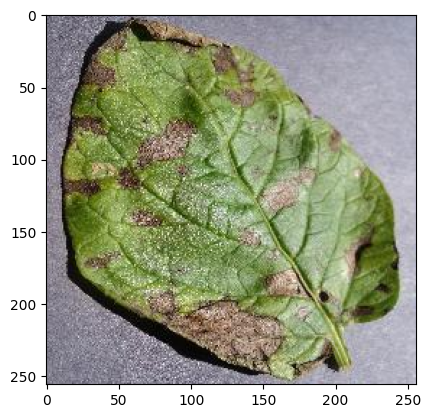

In [46]:
img_open = Image.open("data/test/test/PotatoEarlyBlight1.JPG") # INPUT IMAGE

convert_to_tensor = transforms.ToTensor()
img = convert_to_tensor(img_open)
plt.imshow(img.permute(1, 2, 0))
print(f'Prediction: {predict_image(img, test_model)}')